In [1]:
import numpy as np
import pandas as pd
import plotly.express as px


class generate_graph_data_handler():

    def __init__(self, df_ecg: pd.DataFrame, time_window: int):

        self.df_graph_data = df_ecg
        self.df_graph_data_stream = df_ecg
        self.time_window = time_window
        self.starting_frame = 0
        self.ending_frame = self.starting_frame + self.time_window
        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)

        self.y_axis = self.df_graph_data['ECG'].\
            loc[self.starting_frame:self.ending_frame]
        # Padding for
        temp_list = np.zeros(self.time_window + 1)
        temp_list[:len(self.y_axis)] = self.y_axis
        self.y_axis = temp_list

    def update_graph_data(self, df_ecg: pd.DataFrame, time_window: int) \
            -> [np.array, np.array]:

        self.df_graph_data = df_ecg
        self.time_window = time_window

        # If data displayed in graph reach the right
        if (self.df_graph_data.index[-1:][0] - (
                                                self.starting_frame)) >= (
                                                self.time_window):
            self.starting_frame += self.time_window
            self.ending_frame = self.starting_frame + self.time_window
            self.x_axis = np.arange(self.starting_frame,
                                    self.starting_frame + self.time_window+1)

        # Update of y_axis and padding
        self.y_axis = self.df_graph_data['ECG'].\
            loc[self.starting_frame:self.ending_frame].values
        temp_list = np.zeros(self.time_window + 1)
        temp_list[:len(self.y_axis)] = self.y_axis
        self.y_axis = temp_list


        return self.x_axis, self.y_axis

    def update_graph_data_stream(self, df_ecg: pd.DataFrame, stream_count: int) \
            -> [np.array, np.array]:

        self.df_graph_data_stream = df_ecg
        self.stream_count = stream_count
        print(self.time_window)

        # Update of y_axis and padding
        # self.y_axis = self.df_graph_data['ECG'].\
        #    loc[self.starting_frame:self.ending_frame].values

        temp_list = np.zeros(self.time_window + 1)
        for i in range(self.time_window + 1):
            temp_list[i] = df_ecg['ECG'].loc[int(round(stream_count / self.time_window, 0))]
        self.df_graph_data_stream = self.df_graph_data_stream.append({'ECG': temp_list}, ignore_index=True)
        
        # If data displayed in graph reach the right
        if (self.df_graph_data_stream.index[-1:][0] - (
                                                self.starting_frame)) >= (
                                                self.time_window):
            self.starting_frame += self.time_window
            self.ending_frame = self.starting_frame + self.time_window
            self.x_axis = np.arange(self.starting_frame,
                                    self.starting_frame + self.time_window+1)

            print('x_axis_len:{}'.format(len(self.x_axis)))

        # Update of y_axis and padding
            self.y_axis = self.df_graph_data_stream['ECG'].\
            loc[self.starting_frame:self.ending_frame].values
            #print(self.y_axis)
            temp_list = np.zeros(self.time_window + 1)
            temp_list[:len(self.y_axis)] = self.y_axis[:len(self.y_axis)]
            print(temp_list)
            #self.y_axis = temp_list

        return self.x_axis, self.y_axis

    def reinitialize(self):

        self.starting_frame = 0
        self.ending_frame = self.starting_frame + self.time_window
        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = np.zeros(self.time_window + 1)


def graph_generation(chart, x, y, slider_y_axis, data_freq):
    fig = px.line(x=x*data_freq,
                  y=y,
                  title='Live EEG',
                  range_y=slider_y_axis,
                  color_discrete_sequence=['green'],
                  render_mode='svg',
                  template='plotly_white',
                  height=600,
                  labels={'x': 'seconds', 'y': 'ECG value'})
    chart.empty()
    chart.plotly_chart(figure_or_data=fig)


In [12]:
temp_df = pd.DataFrame()
temp_df = temp_df.append({'ECG': [0,2,54,43]}, ignore_index=True)
temp_df = temp_df.append({'duration': [0,1,2,3]}, ignore_index=True)
temp_df.head()

,ECG,duration
0,"[0, 2, 54, 43]",NaN
1,NaN,"[0, 1, 2, 3]"


In [20]:
temp_df

,ECG,duration
0,0,0
1,2,1
2,54,2
3,43,3


In [34]:
temp_df['duration'][temp_df['duration'] > 1]

2    2
3    3
6    2
7    3
Name: duration, dtype: int64

In [69]:
x = [0,1,2,3]
y = [2,3,4,4]

In [81]:
(24 - (24 % 10))

20

In [ ]:
df

In [76]:
1 + np.arange(0,1,0.01)

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])

In [72]:
[*x, *y]

[0, 1, 2, 3, 2, 3, 4, 4]

In [82]:
if (last_second_display % 1) < 0.50:
    round_last_second_display = int(round(last_second_display, 0)) + 1
else:
    round_last_second_display = int(round(last_second_display, 0))

seconds_to_display = 10
added_duration = np.arange(round_last_second_display, seconds_to_display + 1, 1)
added_ecg  = np.zeros(seconds_to_display - round_last_second_display +1)
temp_df = pd.DataFrame({'ECG': added_ecg, 'duration': added_duration})
temp_df

,ECG,duration
0,0.0,3
1,0.0,4
2,0.0,5
3,0.0,6
4,0.0,7
5,0.0,8
6,0.0,9
7,0.0,10


In [91]:
temp_df['duration'][(temp_df['duration'] > 2) & (temp_df['duration'] < 8)]

0    3
1    4
2    5
3    6
4    7
Name: duration, dtype: int64

In [106]:
temp_df = pd.read_csv('../df_now.csv')
temp_df

,EEG
0,-753.664
1,-1146.880
2,-720.896
3,-966.656
4,-950.272
...,...
643,-933.888
644,-1179.648
645,-753.664
646,-1163.264


In [112]:
temp_df = pd.read_csv('simulation/df_simulation.csv')
temp_df[:100]

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
95,-770.048
96,-802.816
97,-770.048
98,-720.896


<AxesSubplot:>

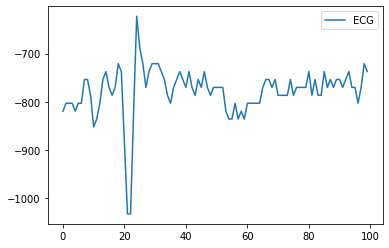

In [124]:
import seaborn as sns
temp_df = pd.read_csv('simulation/df_simulation.csv')
sns.lineplot(data=temp_df[:100])

<AxesSubplot:>

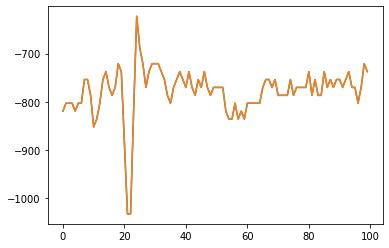

In [125]:
from scipy.interpolate import interp1d

y = temp_df['ECG']
x = temp_df.index
f = interp1d(x, y)
f2 = f = interp1d(x, y, kind='cubic')


limiter = 100
sns.lineplot(x[:limiter], f(x[:limiter]))
sns.lineplot(x[:limiter], f2(x[:limiter]))

<AxesSubplot:>

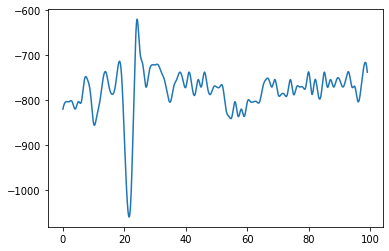

In [150]:
limiter = 100

df_test = temp_df[:100]

y = df_test['ECG'].values
x = df_test.index
#sns.lineplot(x,y)


from scipy import interpolate
x_new = np.linspace(x[0],x[-1],len(x)*2000)
a_BSpline = interpolate.make_interp_spline(x,y)
y_new = a_BSpline(x_new)
sns.lineplot(x_new,y_new)

<AxesSubplot:>

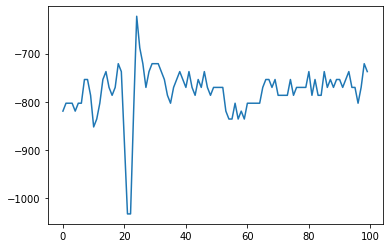

In [151]:
sns.lineplot(x,y)

In [27]:
temp_df = pd.DataFrame({'ECG': [0,2,54,43], 'duration': [0,1,2,3]})
df_add = pd.DataFrame({'ECG': [0,2,54,43], 'duration': [0,1,2,3]})
temp_df = pd.concat([temp_df, df_add], ignore_index=True)
temp_df.head(10)

,ECG,duration
0,0,0
1,2,1
2,54,2
3,43,3
4,0,0
5,2,1
6,54,2
7,43,3


In [ ]:
def update_graph_data_stream2(self, df_ecg: pd.DataFrame, stream_count: int) \
            -> [np.array, np.array]:

        self.df_graph_data_stream = df_ecg
        self.stream_count = stream_count
        print(self.time_window)

        # Update of y_axis and padding
        # self.y_axis = self.df_graph_data['ECG'].\
        #    loc[self.starting_frame:self.ending_frame].values

        temp_list = np.zeros(self.time_window + 1)
        for i in range(self.time_window + 1):
            temp_list[i] = df_ecg['ECG'].loc[int(round(stream_count / self.time_window, 0))]
        self.df_graph_data_stream = self.df_graph_data_stream.append({'ECG': temp_list}, ignore_index=True)
        
        # If data displayed in graph reach the right
        if (self.df_graph_data_stream.index[-1:][0] - (
                                                self.starting_frame)) >= (
                                                self.time_window):
            self.starting_frame += self.time_window
            self.ending_frame = self.starting_frame + self.time_window
            self.x_axis = np.arange(self.starting_frame,
                                    self.starting_frame + self.time_window+1)

            print('x_axis_len:{}'.format(len(self.x_axis)))

        # Update of y_axis and padding
            self.y_axis = self.df_graph_data_stream['ECG'].\
            loc[self.starting_frame:self.ending_frame].values
            #print(self.y_axis)
            temp_list = np.zeros(self.time_window + 1)
            temp_list[:len(self.y_axis)] = self.y_axis[:len(self.y_axis)]
            print(temp_list)
            #self.y_axis = temp_list

        return self.x_axis, self.y_axis

    def reinitialize(self):

        self.starting_frame = 0
        self.ending_frame = self.starting_frame + self.time_window
        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = np.zeros(self.time_window + 1)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
import threading

def printit():
  threading.Timer(5.0, printit).start()
  print("Hello, World!")

printit()


Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!
Hello, World!


In [ ]:
import datetime

today = datetime.datetime.today()

In [29]:
today = datetime.datetime.today()
clock_1 = today+ datetime.timedelta(microseconds =10000000)
clock_2 = today + datetime.timedelta(microseconds =1000000)


In [35]:
clock_1 - clock_2 > datetime.timedelta(seconds=0)

False

In [6]:
import datetime

timer_delay_ms = 100000

today = datetime.datetime.today()  + datetime.timedelta(seconds=5)
timer = today + datetime.timedelta(microseconds = timer_delay_ms)

for i in range(20):
    while (timer - datetime.datetime.today()) >= datetime.timedelta(seconds=0):
        pass
    timer = datetime.datetime.today() + datetime.timedelta(microseconds =1000000)
    print('test', timer)



test 2020-11-04 23:12:36.205469
test 2020-11-04 23:12:37.205473
test 2020-11-04 23:12:38.205476
test 2020-11-04 23:12:39.205480
test 2020-11-04 23:12:40.205484


KeyboardInterrupt: 

In [7]:
timer_offset = 5/53.45

In [9]:
print(datetime.datetime.today())
print(datetime.datetime.today() + datetime.timedelta(microseconds= 1000000*timer_offset))

2020-11-04 23:39:48.287158
2020-11-04 23:39:48.380922


In [15]:
1/53*5

0.09433962264150943

In [13]:
print(datetime.timedelta(microseconds= 1000000*timer_offset))

0:00:00.093545


In [2]:
df = pd.read_csv('df.csv')

In [3]:
df[:200]

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
195,-1015.808
196,-802.816
197,-622.592
198,-671.744


In [6]:
window = 180

class show_window_data():

    def __init__(self, df_ecg):
        self.df_data = df_ecg
        self.starting_frame = 0
        self.ending_frame = window
        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = self.df_data['ECG'].\
            loc[self.starting_frame:self.ending_frame].values

        # Padding
        temp_list = np.zeros(window + 1)
        temp_list[:len(self.y_axis)] = self.y_axis
        self.y_axis = temp_list

    def new_data_available(self, df):
        self.df_data = df
        if (self.df_data.index[-1:][0] - self.starting_frame) >= 180:
            self.df_data = df
            self.starting_frame += window
            self.ending_frame += window

        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = self.df_data['ECG'].\
            loc[self.starting_frame:self.ending_frame].values
        if len(self.y_axis) == window + 1:
            pass
        else:
            temp_list = np.zeros(window + 1)
            temp_list[:len(self.y_axis)] = self.y_axis
            self.y_axis = temp_list

        return self.df_data, self.x_axis, self.y_axis

In [9]:
show_window_data_a = show_window_data(df)

TypeError: __init__() missing 1 required positional argument: 'df_ecg'

In [8]:
show_window_data_a.df_data

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
3203,-884.736
3204,-933.888
3205,-901.120
3206,-917.504


<AxesSubplot:>

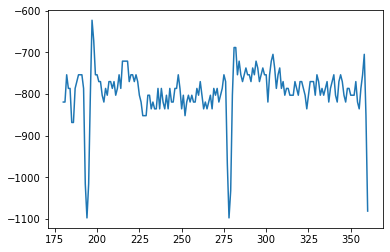

In [72]:
x, y = show_window_data_a.new_data_available(df)
sns.lineplot(x=x, y=y)

In [25]:
import plotly.express as px

fig = px.line(x=x, y=y, title='Test')
fig.show()

In [74]:
df

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
3203,-884.736
3204,-933.888
3205,-901.120
3206,-917.504


In [83]:
class data_simulation:

    def __init__(self):
        self.df = df
        self.df_ini = 

In [84]:
data_sim = data_simulation()

In [85]:
data_sim.df

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
3203,-884.736
3204,-933.888
3205,-901.120
3206,-917.504


In [22]:
window = 180

class data_simulation:

    def __init__(self):
        self.df_data = df_ecg
        self.starting_frame = 0
        self.ending_frame = window
        self.iteration = 0
        self.df_data_simu = self.df_data.loc[self.starting_frame:self.ending_frame + self.iteration ]

    def __call__(self):
        self.iteration += 1
        self.df_data_simu = self.df_data.loc[self.starting_frame:self.ending_frame + self.iteration ]

In [23]:
df_ecg = df

In [28]:
data_simu = data_simulation()
data_simu.iteration

0

In [33]:
data_simu()
data_simu.iteration

3

In [95]:
data_simu.update()
data_simu.df_data_simu

,ECG
0,-819.200
1,-802.816
2,-802.816
3,-802.816
4,-819.200
...,...
178,-819.200
179,-802.816
180,-819.200
181,-819.200
